<a href="https://colab.research.google.com/github/KhushiAgg/Twitter-Sentimental-Analysis/blob/main/Twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twitter Sentimental Analysis on hashtags #onlinelearning or #elearning, or #workfromhome




In [ ]:
#Performing sentimental analysis on the tweets with the hashtags #onlinelearning or #elearning, or #workfromhome

In [ ]:
#importing important libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re

import itertools
import collections

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving twitter_login.csv to twitter_login (3).csv


In [ ]:
#Get the data
log = pd.read_csv('twitter_login.csv')
#log.head()

In [ ]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#create the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#Extract tweets with hashtag #onlinelearning or #elearning, or #workfromhome
hashtags = ["#onlinelearning" ,  "#elearning " , "#workfromhome"]

msgs = []
msg= []
for words in hashtags:

  for tweet in tweepy.Cursor(api.search, q=words, rpp=100, lang = "en", tweet_mode="extented").items(40):
      msg = [tweet.text] 
      msg = tuple(msg)                    
      msgs.append(msg)

df = pd.DataFrame(msgs, columns = ['Tweets'])
df.head()

,Tweets
0,RT @Parents4Support: #Colorado families! Don’t...
1,#Colorado families! Don’t miss out on the @LIB...
2,RT @khudkaar: Enroll now to be an expert video...
3,Make Your Own Online Courses https://t.co/K1bf...
4,RT @SIDESBC: SIDES staff celebrating the annou...


### Preprocessing the Data

In [ ]:
#Create a function to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions
  text = re.sub(r'#', '', text) # Removing the '#' symbol
  text = re.sub(r'RT[\s]', '', text) # Removing RT
  text = re.sub(r':[\s]+', '', text) #Removing : after RT 
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link

  return text

#CLeaning the text
df['Tweets'] = df['Tweets'].apply(cleanText)
df


,Tweets
0,Colorado families! Don’t miss out on the ’s Fa...
1,Colorado families! Don’t miss out on the ’s Fa...
2,Enroll now to be an expert video editor and st...
3,Make Your Own Online Courses onlinecourse onl...
4,SIDES staff celebrating the announcement that ...
...,...
115,Check out _app where you can earn real money o...
116,This DeFi NFT will give you 5x returns in a we...
117,New Remote Full-Stack Programming Job! ClovyrF...
118,Check out _app where you can earn real money o...


In [ ]:
df.shape

(120, 1)

### Performing frequency analysis

In [ ]:
df1 = df.copy()

In [ ]:
#converting to lower case
for i in range(0, df1.shape[0]):
  df1['Tweets'][i] = df1['Tweets'][i].lower().split()
df1.head()

,Tweets
0,"[colorado, families!, don’t, miss, out, on, th..."
1,"[colorado, families!, don’t, miss, out, on, th..."
2,"[enroll, now, to, be, an, expert, video, edito..."
3,"[make, your, own, online, courses, onlinecours..."
4,"[sides, staff, celebrating, the, announcement,..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df1['Tweets']

0      [colorado, families!, don’t, miss, out, on, th...
1      [colorado, families!, don’t, miss, out, on, th...
2      [enroll, now, to, be, an, expert, video, edito...
3      [make, your, own, online, courses, onlinecours...
4      [sides, staff, celebrating, the, announcement,...
                             ...                        
115    [check, out, _app, where, you, can, earn, real...
116    [this, defi, nft, will, give, you, 5x, returns...
117    [new, remote, full-stack, programming, job!, c...
118    [check, out, _app, where, you, can, earn, real...
119    [don't, make, a, long, list, of, goals., pick,...
Name: Tweets, Length: 120, dtype: object

In [ ]:
terms_stop = [[term for term in tweet_words if not term in stop] for tweet_words in df1['Tweets'] ]
terms_stop[:2]

[['colorado',
  'families!',
  'don’t',
  'miss',
  '’s',
  'family',
  'resource',
  '&amp;',
  'school',
  'fair',
  'today',
  'adams',
  'city',
  'high',
  'sc…'],
 ['colorado',
  'families!',
  'don’t',
  'miss',
  '’s',
  'family',
  'resource',
  '&amp;',
  'school',
  'fair',
  'today',
  'adams',
  'city',
  'high…']]

In [ ]:
# List of all words across tweets
all_words = list(itertools.chain(*terms_stop))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15)

[('learning', 21),
 ('elearning', 15),
 ('online', 14),
 ('education', 12),
 ('free', 12),
 ('javascript', 12),
 ('workfromhome', 12),
 ('onlinelearning', 11),
 ('js', 11),
 ('developer', 11),
 ('&amp;', 10),
 ('courses', 10),
 ('make', 10),
 ('learn', 10),
 ('get', 10)]

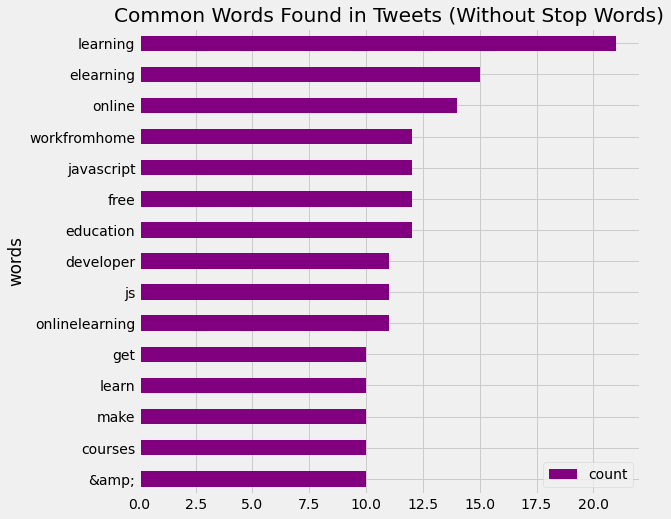

In [ ]:
frequency_tweets = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
frequency_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [ ]:
frequency_tweets[frequency_tweets['words'] == 'onlinelearning']

,words,count
7,onlinelearning,11


In [ ]:
frequency_tweets[frequency_tweets['words'] == 'elearning']

,words,count
1,elearning,15


In [ ]:
frequency_tweets[frequency_tweets['words'] == 'workfromhome']

,words,count
6,workfromhome,12


## Performing Sentimental Analysis

In [ ]:
#To get the subjectivity in the text
#Subjective sentence expresses some personal feelings, views, or beliefs. 

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#To get the polarity in the text
#Polarity simply means emotions expressed in a sentence.
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create new columns 
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df.head()


,Tweets,Subjectivity,Polarity
0,Colorado families! Don’t miss out on the ’s Fa...,0.72,0.43
1,Colorado families! Don’t miss out on the ’s Fa...,0.90,0.70
2,Enroll now to be an expert video editor and st...,0.00,0.00
3,Make Your Own Online Courses onlinecourse onl...,1.00,0.60
4,SIDES staff celebrating the announcement that ...,0.00,0.00


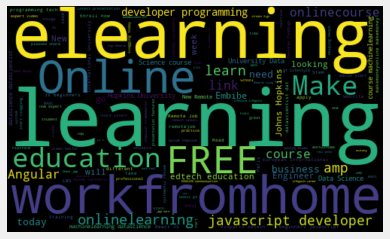

In [ ]:
#Plotting the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Let's compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Colorado families! Don’t miss out on the ’s Fa...,0.720000,0.430000,Positive
1,Colorado families! Don’t miss out on the ’s Fa...,0.900000,0.700000,Positive
2,Enroll now to be an expert video editor and st...,0.000000,0.000000,Neutral
3,Make Your Own Online Courses onlinecourse onl...,1.000000,0.600000,Positive
4,SIDES staff celebrating the announcement that ...,0.000000,0.000000,Neutral
...,...,...,...,...
115,Check out _app where you can earn real money o...,0.300000,0.250000,Positive
116,This DeFi NFT will give you 5x returns in a we...,0.000000,0.000000,Neutral
117,New Remote Full-Stack Programming Job! ClovyrF...,0.327273,-0.009943,Negative
118,Check out _app where you can earn real money o...,0.300000,0.250000,Positive


In [ ]:
df[df.Analysis == 'Negative']

,Tweets,Subjectivity,Polarity,Analysis
6,Importance of Gamification in the world of onl...,0.300000,-0.100000,Negative
9,"Similar, but quite different. What confusing p...",0.370909,-0.032727,Negative
13,"Similar, but quite different. What confusing p...",0.463636,-0.040909,Negative
16,Reliance IndustriesRIL-backed firm Embibe gets...,0.400000,-0.200000,Negative
40,GreatBooks4Math\nVisual Complex Analysis\nTris...,0.200000,-0.150000,Negative
82,is hiring a remote Frontend Engineer (TypeScr...,0.200000,-0.100000,Negative
83,Want to work as a remote Software Engineer So...,0.200000,-0.100000,Negative
114,New Remote Job 🏆👇🏻\n\n Analytics Account Manag...,0.284848,-0.021212,Negative
117,New Remote Full-Stack Programming Job! ClovyrF...,0.327273,-0.009943,Negative
119,Don't make a long list of goals. Pick one for ...,0.200000,-0.025000,Negative


In [ ]:
df[df.Analysis == 'Positive']

,Tweets,Subjectivity,Polarity,Analysis
0,Colorado families! Don’t miss out on the ’s Fa...,0.720000,0.430000,Positive
1,Colorado families! Don’t miss out on the ’s Fa...,0.900000,0.700000,Positive
3,Make Your Own Online Courses onlinecourse onl...,1.000000,0.600000,Positive
5,PollWhat five things couldn’t you live without...,0.500000,0.136364,Positive
8,Celebrate Stem Day by checking out these Top 1...,0.600000,0.466667,Positive
...,...,...,...,...
111,A video about FREE EARN $900 DAILY workathome...,0.400000,0.200000,Positive
112,🌏 New Remote Job! User InsightsShopify Websit...,0.327273,0.005682,Positive
113,TYPE NAMES AND EARN $200 TO $500 FREE EBOOK DO...,0.800000,0.400000,Positive
115,Check out _app where you can earn real money o...,0.300000,0.250000,Positive


In [ ]:
df[df.Analysis == 'Neutral']

,Tweets,Subjectivity,Polarity,Analysis
2,Enroll now to be an expert video editor and st...,0.00,0.0,Neutral
4,SIDES staff celebrating the announcement that ...,0.00,0.0,Neutral
7,Enroll now to be an expert video editor and st...,0.00,0.0,Neutral
10,English vocabulary for bigNick and his friends...,0.00,0.0,Neutral
15,Learn on the go.\n\nStem Onlinelearning Edtech...,0.00,0.0,Neutral
18,The onlinelearning blog has student and alumni...,0.00,0.0,Neutral
26,_EIU_EIU has exceeded 4200 Alumni's till date ...,0.60,0.0,Neutral
27,"_EIU""Hybrid &amp; blended learning approach to...",0.00,0.0,Neutral
28,_EIUIf he did it then who is stopping you. Stu...,0.00,0.0,Neutral
30,_EIUEnroll in the bachelor's degree program pr...,0.00,0.0,Neutral


In [ ]:
#sort and print positive tweets
j = 1
Positive_df = df.sort_values(by=['Polarity'])
for i in range(0, Positive_df.shape[0]):
  if(Positive_df['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + Positive_df['Tweets'][i])
    print()
    j = j+1

1) Colorado families! Don’t miss out on the ’s Family Resource &amp; School Fair today at Adams City High Sc…

2) Colorado families! Don’t miss out on the ’s Family Resource &amp; School Fair today at Adams City High… 

3) Make Your Own Online Courses  onlinecourse onlinelearning onlinecourses education… 

4) PollWhat five things couldn’t you live without?
homeschool homeschooling homeschool2022 homeschoolers… 

5) Celebrate Stem Day by checking out these Top 12 Free STEM Websites (plus hundreds of more links) - Bookmark and sa… 

6) Embibe Archives | Platform to Showcase Innovative Startups and Tech News


 Embibe   onlineLearning

7) Best Online Courses  elearning MOOC onlinecourse onlinelearning MOOCs onlinecourses

8) Can you help Momo find his toys? In this game, kids will learn about sequence. Subscribe to watch more logic traini… 

9) 👶 Your child might develop a feeling of being unloved if you confront them. 

If you want to learn more about child… 

10) Make Your Own Online Co

In [ ]:
#sort and print negative tweets
j = 1
Negative_df = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, Negative_df.shape[0]):
  if(Positive_df['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + Negative_df['Tweets'][i])
    print()
    j = j+1

1) Importance of Gamification in the world of online LMS 
Every training professional has encountered a common problem… 

2) Similar, but quite different. What confusing pairs have you come across when learning a new language? 🤔⠀

langtwt french …

3) Similar, but quite different. What confusing pairs have you come across when learning a new language? 🤔⠀

langtwt… 

4) Reliance IndustriesRIL-backed firm Embibe gets 91% stake in Funtoot


 Embibe  Onlinelearning

5) GreatBooks4Math
Visual Complex Analysis
Tristan Needham, 1997
math science iteachmath mtbos elearning 

6)  is hiring a remote Frontend Engineer (TypeScript / React) WorkFromHome FrontEndProgramming



7) Want to work as a remote Software Engineer  South Africa at  ? WorkFromHome BackEndProgramming



8) New Remote Job 🏆👇🏻

 Analytics Account Manager  remotejobs remote remoteworking workfromhome homejobs remotejob

9) New Remote Full-Stack Programming Job! ClovyrFull-stack / Platform Engineer 
Apply here!  

10) Don't make a

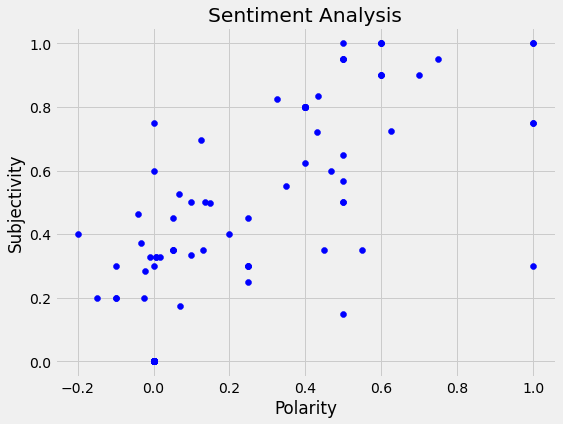

In [ ]:
#Plotting polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

print("Percentage of positive tweets: " , round((ptweets.shape[0] / df.shape[0]) * 100, 1), "%" )

Percentage of positive tweets:  50.8 %


In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

print("Percentage of negative tweets: " ,round((ntweets.shape[0] / df.shape[0]) * 100, 1), "%" )

Percentage of negative tweets:  8.3 %


In [ ]:
# Get the percentage of neutral tweets
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweets']

print("Percentage of neutral tweets: " ,round((neutweets.shape[0] / df.shape[0]) * 100, 1), "%" )

Percentage of neutral tweets:  40.8 %


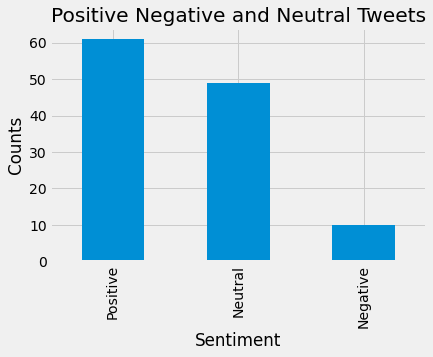

In [ ]:
#Plotting the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title("Positive Negative and Neutral Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()